# KAPD 減重相關知識量表--Rasch Model分析

# 匯入需要的套件與檔案

In [1]:
library(tableone)
library(readr)
library(ltm)
library(psych)
library(corrr)

Loading required package: MASS
Loading required package: msm
Loading required package: polycor

Attaching package: 'psych'

The following object is masked from 'package:ltm':

    factor.scores

The following object is masked from 'package:polycor':

    polyserial

Loading required package: dplyr

Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
kapd <- read.csv("C:/Users/Julie/Desktop/碩班/3_問卷設計/data/2004-2008營養資料庫 %28KAPD%29.csv", header=TRUE, sep=",")


# **敘述性統計**

- 樣本數: 2674  。  遺漏值: 0  
  男性與女性比例相當  
  可以見得: 第二題最困難，第四題最簡單

In [15]:
descript(kapd)


Descriptive statistics for the 'kapd' data-set

Sample:
 9 items and 2674 sample units; 0 missing values

Proportions for each level of response:
$id
 A004  A005  A008  A009  A010  A011  A012  A013  A014  A015  A016  A017  A018 
4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 
 A019  A020  A021  A022  A031  A033  A034  A036  A038  A040  A042  A043  A045 
4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 
 A046  A047  A048  A050  A051  A052  A053  A054  A057  A059  A061  A062  A063 
4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 
 A064  A065  A066  A067  A069  A070  A071  A072  A073  A074  A075  A076  A078 
4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 
 A079  A080  A081  A082  A083  A084  A085  A086  A088  A089  A091  A092  A093 
4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 4e-04 
 A094  A096  A097  A098  A099  A100  A101  A103  A104  A105

In [16]:
summary(kapd)

       id       sex           age             kapd01          kapd02      
 A004   :   1   1:1331   Min.   : 19.00   Min.   :0.000   Min.   :0.0000  
 A005   :   1   2:1343   1st Qu.: 38.00   1st Qu.:0.000   1st Qu.:0.0000  
 A008   :   1            Median : 53.00   Median :0.000   Median :0.0000  
 A009   :   1            Mean   : 52.67   Mean   :0.365   Mean   :0.1328  
 A010   :   1            3rd Qu.: 68.00   3rd Qu.:1.000   3rd Qu.:0.0000  
 A011   :   1            Max.   :101.00   Max.   :1.000   Max.   :1.0000  
 (Other):2668                                                             
     kapd03           kapd04           kapd05          kapd06      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :0.000   Median :1.0000  
 Mean   :0.1533   Mean   :0.6832   Mean   :0.331   Mean   :0.6062  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1

### **盒鬚圖**
    兩性別在年齡上分布狀況相近


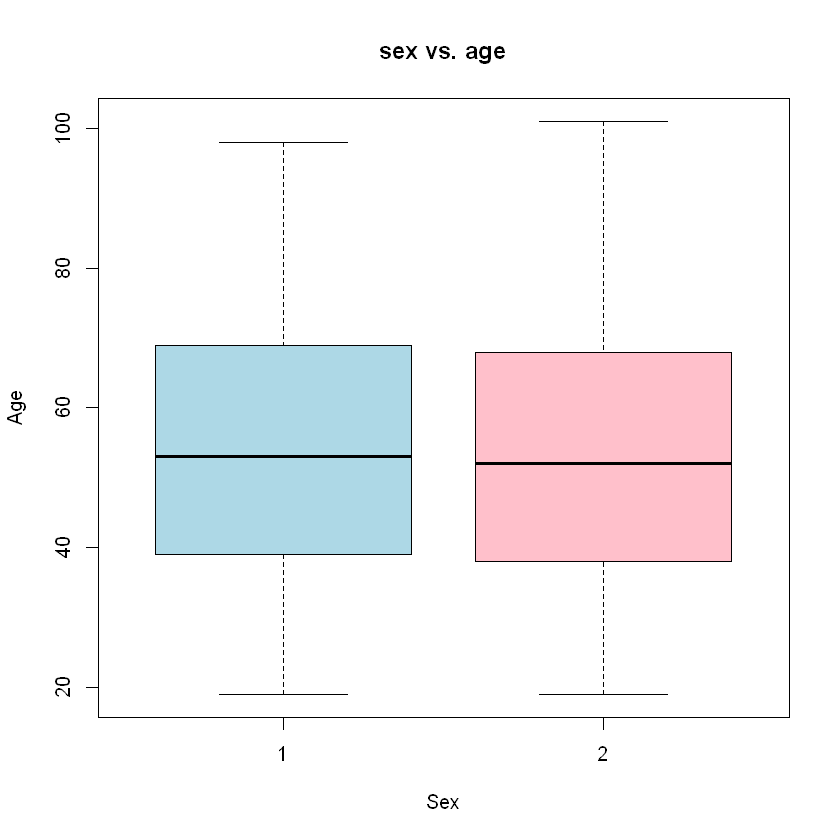

In [17]:
boxplot(age~sex,data=kapd,main="sex vs. age",xlab="Sex",ylab="Age", col=c("lightblue","pink"))

## 通過第一題者

In [18]:
data <- subset(kapd, kapd01==1)

- 性別比例相當  ， 而實際上第二題與第三題答對比例約為40%  
  並且實際人數男性有492位，女性有484位。

In [19]:
descript(data)
summary(data)


Descriptive statistics for the 'data' data-set

Sample:
 9 items and 976 sample units; 0 missing values

Proportions for each level of response:
$id
 A004  A005  A008  A009  A010  A011  A012  A013  A014  A015  A016  A017  A018 
0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.001 
 A019  A020  A021  A022  A031  A033  A034  A036  A038  A040  A042  A043  A045 
0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.001 0.001 0.000 
 A046  A047  A048  A050  A051  A052  A053  A054  A057  A059  A061  A062  A063 
0.000 0.000 0.001 0.001 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 
 A064  A065  A066  A067  A069  A070  A071  A072  A073  A074  A075  A076  A078 
0.001 0.001 0.001 0.000 0.001 0.000 0.000 0.001 0.001 0.001 0.000 0.001 0.000 
 A079  A080  A081  A082  A083  A084  A085  A086  A088  A089  A091  A092  A093 
0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.001 0.001 0.000 0.000 0.001 0.001 
 A094  A096  A097  A098  A099  A100  A101  A103  A104  A105 

       id      sex          age         kapd01      kapd02      
 A009   :  1   1:492   Min.   :19   Min.   :1   Min.   :0.0000  
 A017   :  1   2:484   1st Qu.:43   1st Qu.:1   1st Qu.:0.0000  
 A018   :  1           Median :59   Median :1   Median :0.0000  
 A031   :  1           Mean   :56   Mean   :1   Mean   :0.3637  
 A042   :  1           3rd Qu.:70   3rd Qu.:1   3rd Qu.:1.0000  
 A043   :  1           Max.   :98   Max.   :1   Max.   :1.0000  
 (Other):970                                                    
     kapd03           kapd04           kapd05         kapd06      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.00   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :1.00   Median :1.0000  
 Mean   :0.4201   Mean   :0.7889   Mean   :0.54   Mean   :0.6855  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00   Max.   :1.0000  
           

- 其中可以看出相較於整體分析，實際情形是  
  回答第二題與第三題的女性年齡較為集中

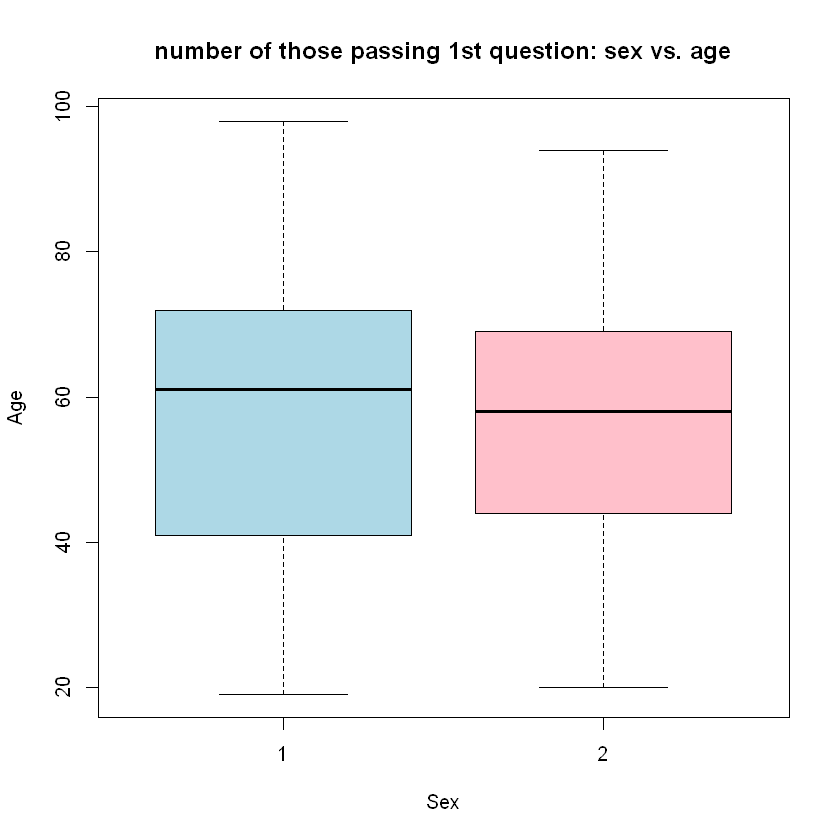

In [20]:
#(看出女性的年齡較為集中)
boxplot( age~sex,data=data,main="number of those passing 1st question: sex vs. age",
        xlab="Sex",ylab="Age",col=c("lightBlue","pink"))

## 年齡分析:  45歲以下、45-65歲與65歲以上分布
- 由kapd建立kapdage分析 

In [21]:
kapdage <- kapd
agesub <- 0
agesub[kapdage$age<45]<- 0
agesub[kapdage$age>=45 & kapdage$age<65] <- 1
agesub[kapdage$age>=65] <- 2
agesub<-factor(agesub, levels=c(0,1,2), labels=c("未滿45歲", "45歲-65歲", "65歲以上"))  
sex2 <- factor(kapdage$sex, levels=c(1,2),labels = c("male","female"))

## - kapd的年齡組與性別分布狀況

In [26]:
table(agesub,sex2) 
agesubsex <- table(agesub,sex2) 
round(table(agesubsex),2)

           sex2
agesub      male female
  未滿45歲   437    455
  45歲-65歲  439    445
  65歲以上   455    443

           sex2
agesub      male female
  未滿45歲  0.16   0.17
  45歲-65歲 0.16   0.17
  65歲以上  0.17   0.17

## 各題實際答題狀況與性別關係

In [27]:
sex <- factor(kapd$sex, levels=c(1,2),labels = c("male","female"))
kapd01 <- factor(kapd$kapd01, levels=c(0,1),labels=c("False","True"))
kapd02 <- factor(kapd$kapd02, levels=c(0,1),labels=c("False","True"))
kapd03 <- factor(kapd$kapd03, levels=c(0,1),labels=c("False","True"))
kapd04 <- factor(kapd$kapd04, levels=c(0,1),labels=c("False","True"))
kapd05 <- factor(kapd$kapd05, levels=c(0,1),labels=c("False","True"))
kapd06 <- factor(kapd$kapd06, levels=c(0,1),labels=c("False","True"))

sex1 <- factor(data$sex, levels=c(1,2),labels = c("male","female"))
kapd12 <- factor(data$kapd02, levels=c(0,1),labels=c("False","True"))
kapd13 <- factor(data$kapd03, levels=c(0,1),labels=c("False","True"))

kapds1 <- with(kapd,table(kapd01,sex))
kapds2 <- with(kapd,table(kapd02,sex))
kapds12 <- with(data,table(kapd02,sex))
kapds3 <- with(kapd,table(kapd03,sex))
kapds13 <- with(data,table(kapd03,sex))
kapds4 <- with(kapd,table(kapd04,sex))
kapds5 <- with(kapd,table(kapd05,sex))
kapds6 <- with(kapd,table(kapd06,sex))

* 性別答對情形之個數與比例


In [28]:
table(kapd01,sex) 
round(table(kapds1),2)

table(kapd02,sex)
round(table(kapds2),2)

table(kapd03,sex)
round(table(kapds3),2)

table(kapd04,sex)
round(table(kapds4),2)

table(kapd05,sex)
round(table(kapds5),2)

table(kapd06,sex)
round(table(kapds6),2)

       sex
kapd01  male female
  False  839    859
  True   492    484

      sex
kapd01    1    2
     0 0.31 0.32
     1 0.18 0.18

       sex
kapd02  male female
  False 1148   1171
  True   183    172

      sex
kapd02    1    2
     0 0.43 0.44
     1 0.07 0.06

       sex
kapd03  male female
  False 1117   1147
  True   214    196

      sex
kapd03    1    2
     0 0.42 0.43
     1 0.08 0.07

       sex
kapd04  male female
  False  421    426
  True   910    917

      sex
kapd04    1    2
     0 0.16 0.16
     1 0.34 0.34

       sex
kapd05  male female
  False  899    890
  True   432    453

      sex
kapd05    1    2
     0 0.34 0.33
     1 0.16 0.17

       sex
kapd06  male female
  False  526    527
  True   805    816

      sex
kapd06    1    2
     0 0.20 0.20
     1 0.30 0.31

## 第二、三題實際答題狀況與性別關係

In [29]:
table(kapd12,sex1)
round(prop.table(kapds12),2)

table(kapd13,sex1)
round(prop.table(kapds13),2)

       sex1
kapd12  male female
  False  309    312
  True   183    172

      sex
kapd02    1    2
     0 0.32 0.32
     1 0.19 0.18

       sex1
kapd13  male female
  False  278    288
  True   214    196

      sex
kapd03    1    2
     0 0.28 0.30
     1 0.22 0.20

## **cronbach's alpha**

- 目前整題組的alpha是0.6171 ， 社會科學中是可被接受的信度值。  
  排除掉第六題能使整題組的內部一致性上升至0.6540

In [30]:
descript(kapd[,4:9])


Descriptive statistics for the 'kapd[, 4:9]' data-set

Sample:
 6 items and 2674 sample units; 0 missing values

Proportions for each level of response:
            0      1   logit
kapd01 0.6350 0.3650 -0.5537
kapd02 0.8672 0.1328 -1.8768
kapd03 0.8467 0.1533 -1.7087
kapd04 0.3168 0.6832  0.7687
kapd05 0.6690 0.3310 -0.7038
kapd06 0.3938 0.6062  0.4314


Frequencies of total scores:
       0   1   2   3   4   5  6
Freq 270 685 713 448 254 221 83


Point Biserial correlation with Total Score:
       Included Excluded
kapd01   0.7510   0.5534
kapd02   0.6348   0.4728
kapd03   0.6456   0.4747
kapd04   0.4752   0.1933
kapd05   0.6047   0.3519
kapd06   0.4613   0.1605


Cronbach's alpha:
                  value
All Items        0.6171
Excluding kapd01 0.4778
Excluding kapd02 0.5391
Excluding kapd03 0.5341
Excluding kapd04 0.6367
Excluding kapd05 0.5722
Excluding kapd06 0.6540


Pairwise Associations:
   Item i Item j p.value
1       4      6   2e-05
2       2      6   5e-06
3       3     

## **item-item correlation**

- 第一題與第三題有較強的相關性，相關係數為0.56。

In [31]:
rcor.test(kapd[,4:9], method = "kendall")  #上面是相關係數，下面是所對應的P值


       kapd01 kapd02 kapd03 kapd04 kapd05 kapd06
kapd01  *****  0.516  0.561  0.172  0.337  0.123
kapd02 <0.001  *****  0.473  0.120  0.256  0.090
kapd03 <0.001 <0.001  *****  0.100  0.234  0.097
kapd04 <0.001 <0.001 <0.001  *****  0.142  0.083
kapd05 <0.001 <0.001 <0.001 <0.001  *****  0.126
kapd06 <0.001 <0.001 <0.001 <0.001 <0.001  *****

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


# **建立模型**

## Rasch Model: 鑑別度固定為1

In [32]:
model1 <- rasch(kapd[,4:9],constraint = cbind(length(kapd[,4:9]) + 1, 1))

In [33]:
model1


Call:
rasch(data = kapd[, 4:9], constraint = cbind(length(kapd[, 4:9]) + 
    1, 1))

Coefficients:
Dffclt.kapd01  Dffclt.kapd02  Dffclt.kapd03  Dffclt.kapd04  Dffclt.kapd05  
        0.672          2.247          2.054         -0.946          0.856  
Dffclt.kapd06         Dscrmn  
       -0.538          1.000  

Log.Lik: -8532.615


## 當鑑別度皆為1時  
### 可以見得各題項的難度最高的是第二題   
### 最簡單的是第四題。

In [34]:
summary(model1, order=TRUE)


Call:
rasch(data = kapd[, 4:9], constraint = cbind(length(kapd[, 4:9]) + 
    1, 1))

Model Summary:
   log.Lik      AIC      BIC
 -8532.615 17077.23 17112.58

Coefficients:
                value std.err   z.vals
Dffclt.kapd01  0.6720  0.0486  13.8247
Dffclt.kapd02  2.2472  0.0645  34.8151
Dffclt.kapd03  2.0535  0.0614  33.4443
Dffclt.kapd04 -0.9465  0.0497 -19.0446
Dffclt.kapd05  0.8555  0.0495  17.2851
Dffclt.kapd06 -0.5379  0.0479 -11.2284
Dscrmn         1.0000      NA       NA

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.0073 
quasi-Newton: BFGS 



In [35]:
coef(model1,order=TRUE)

,Dffclt,Dscrmn
kapd04,-0.9464755,1
kapd06,-0.5378815,1
kapd01,0.6719969,1
kapd05,0.8555174,1
kapd03,2.0535314,1
kapd02,2.2471997,1


# Rasch model: 鑑別度由電腦自己選

In [36]:
model2 <- rasch(kapd[,4:9])

In [37]:
model2


Call:
rasch(data = kapd[, 4:9])

Coefficients:
Dffclt.kapd01  Dffclt.kapd02  Dffclt.kapd03  Dffclt.kapd04  Dffclt.kapd05  
        0.538          1.806          1.651         -0.766          0.687  
Dffclt.kapd06         Dscrmn  
       -0.438          1.359  

Log.Lik: -8482.059


###  - 鑑別度為1.3592   
### 各題項的難度最高的是第二題   
###   最簡單的是第四題。

In [38]:
summary(model2)


Call:
rasch(data = kapd[, 4:9])

Model Summary:
   log.Lik      AIC      BIC
 -8482.059 16978.12 17019.36

Coefficients:
                value std.err   z.vals
Dffclt.kapd01  0.5384  0.0410  13.1230
Dffclt.kapd02  1.8059  0.0626  28.8478
Dffclt.kapd03  1.6511  0.0589  28.0170
Dffclt.kapd04 -0.7659  0.0429 -17.8448
Dffclt.kapd05  0.6867  0.0425  16.1533
Dffclt.kapd06 -0.4377  0.0399 -10.9825
Dscrmn         1.3592  0.0389  34.9620

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.00096 
quasi-Newton: BFGS 



check the fit on the margins

In [39]:
margins(model2)


Call:
rasch(data = kapd[, 4:9])

Fit on the Two-Way Margins

Response: (0,0)
  Item i Item j  Obs     Exp (O-E)^2/E    
1      4      6  384  481.19     19.63 ***
2      1      3 1698 1529.03     18.67 ***
3      1      2 1698 1554.37     13.27 ***

Response: (1,0)
  Item i Item j Obs    Exp (O-E)^2/E    
1      1      3 566 735.97     39.25 ***
2      2      3 146 238.17     35.67 ***
3      1      2 621 766.40     27.58 ***

Response: (0,1)
  Item i Item j Obs    Exp (O-E)^2/E    
1      1      3   0 162.19    162.19 ***
2      1      2   0 136.85    136.85 ***
3      2      3 201 293.94     29.38 ***

Response: (1,1)
  Item i Item j Obs    Exp (O-E)^2/E    
1      1      3 410 246.81    107.90 ***
2      1      2 355 216.38     88.81 ***
3      2      3 209 115.06     76.69 ***

'***' denotes a chi-squared residual greater than 3.5 


In [40]:
margins(model2, type = "three-way")


Call:
rasch(data = kapd[, 4:9])

Fit on the Three-Way Margins

Response: (0,0,0)
  Item i Item j Item k  Obs     Exp (O-E)^2/E    
1      1      2      3 1698 1420.82     54.07 ***
2      4      5      6  318  422.82     25.99 ***
3      1      4      6  310  413.01     25.69 ***

Response: (1,0,0)
  Item i Item j Item k Obs    Exp (O-E)^2/E    
1      1      2      3 420 606.01     57.09 ***
2      1      3      5 281 417.38     44.56 ***
3      2      3      5  51 117.83     37.91 ***

Response: (0,1,0)
  Item i Item j Item k Obs    Exp (O-E)^2/E    
1      1      2      3   0 108.21    108.21 ***
2      1      3      5   0  91.98     91.98 ***
3      1      2      5   0  76.73     76.73 ***

Response: (1,1,0)
  Item i Item j Item k Obs   Exp (O-E)^2/E    
1      1      3      6 116 31.26    229.74 ***
2      1      2      6 100 26.55    203.25 ***
3      1      3      4  85 21.87    182.19 ***

Response: (0,0,1)
  Item i Item j Item k Obs    Exp (O-E)^2/E    
1      1      2      3

In [69]:
coef(model2, order=TRUE)

,Dffclt,Dscrmn
kapd04,-0.7658995,1.359246
kapd06,-0.4376994,1.359246
kapd01,0.5384267,1.359246
kapd05,0.6866862,1.359246
kapd03,1.6511148,1.359246
kapd02,1.8058955,1.359246


# Likelihood Ratio Test  
###  選擇AIC與BIC最小者，故選擇model2。


In [41]:
anova(model1, model2)


 Likelihood Ratio Table
            AIC      BIC  log.Lik    LRT df p.value
model1 17077.23 17112.58 -8532.62                  
model2 16978.12 17019.36 -8482.06 101.11  1  <0.001


# Item Characteristic and Information Curves 

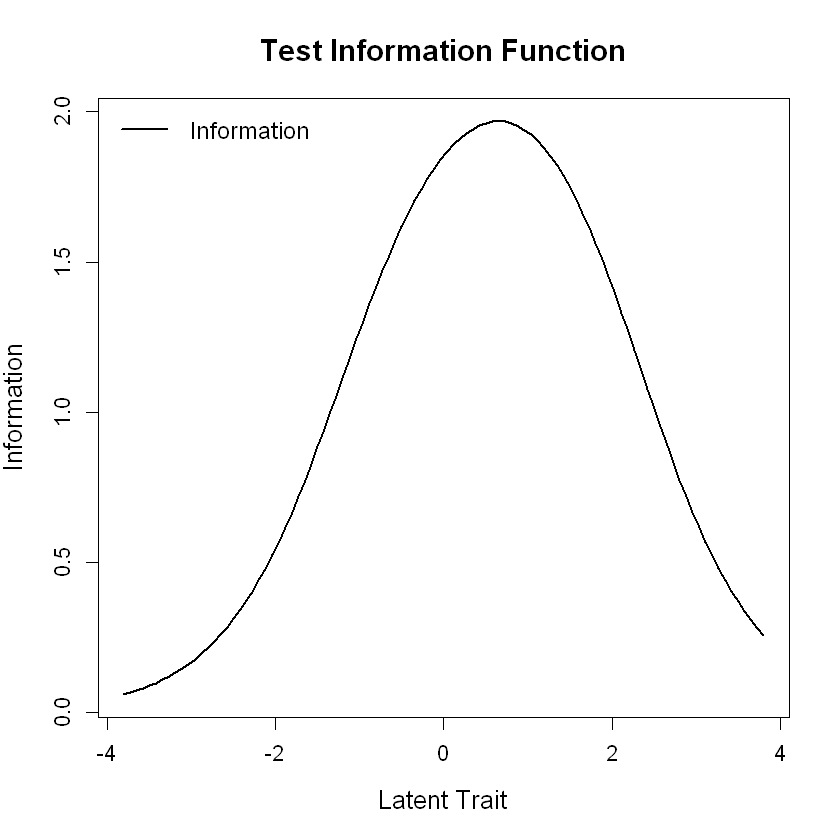

In [43]:
plot(model2, type = "IIC", lwd = 2, cex = 1.2, legend = TRUE, cx = "topleft",
     xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3, cex.axis = 1.1,items=0)

### 整份問卷之資訊量為8.16  
落於θ＝( -4 , 4 )之間的資訊量為7.97，佔整體資訊量97.73%。

In [44]:
information(model2,c(-4,4),items=c(1:6))


Call:
rasch(data = kapd[, 4:9])

Total Information = 8.16
Information in (-4, 4) = 7.97 (97.73%)
Based on items 1, 2, 3, 4, 5, 6


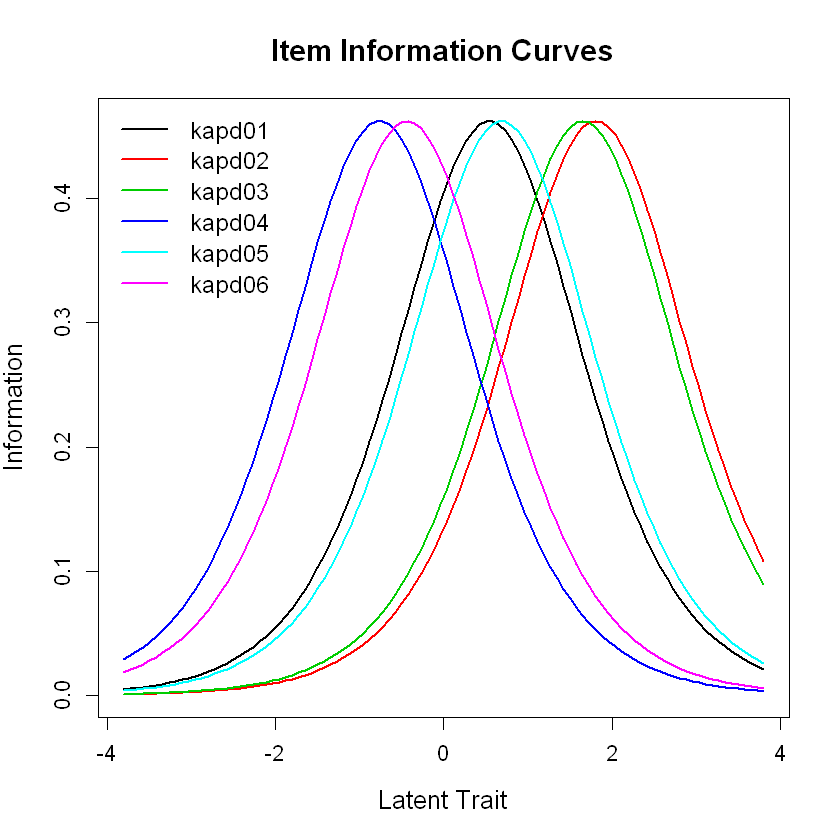

In [45]:
plot(model2, type = "IIC", lwd = 2, cex = 1.2, legend = TRUE, cx = "topleft",
     xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3, cex.axis = 1.1)


## 只要加上 **items= **就可以跑出個別

## 每一題項提供的資訊量  
    kapd04及kapd06最能鑑別能力值 θ＝( -2 , 0 )
    kapd01及kapd05最能鑑別能力值 θ＝( -1 , 1 )
    kapd02及kapd03最能鑑別能力值 θ＝( 1 , 3 )

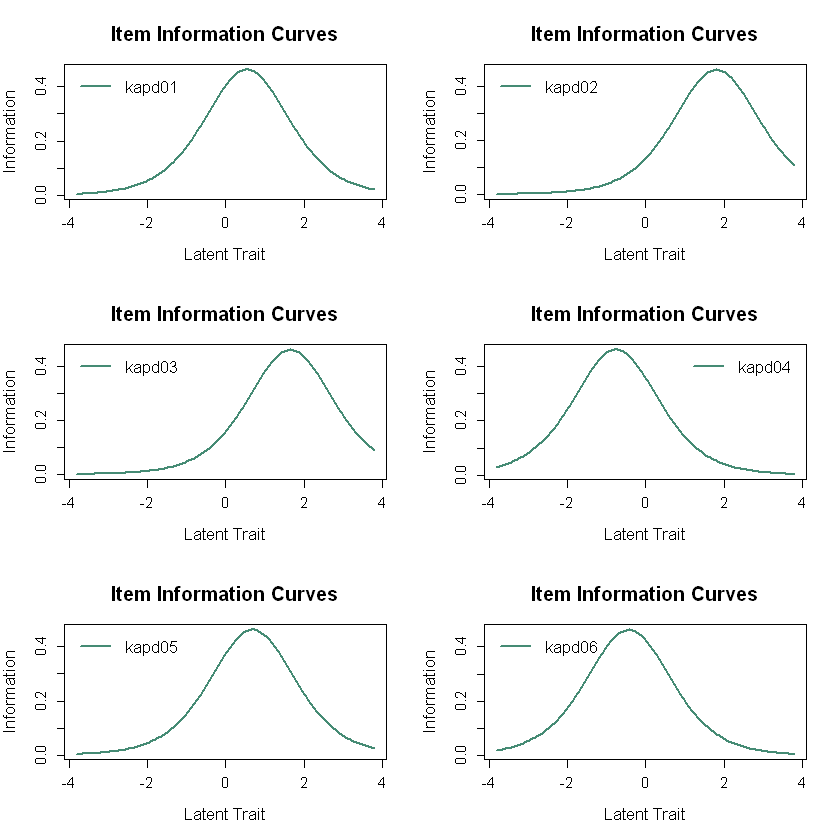

In [47]:
par(mfrow = c(3, 2))

    for (ctg in 1:3) {
    plot(model2, type = "IIC",items = ctg, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1, col = "aquamarine4")
}

    plot(model2, type = "IIC",items = 4, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topright",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1, col = "aquamarine4")

for (ctg in 5:6) {
    plot(model2, type = "IIC",items = ctg, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1, col = "aquamarine4")
}


## ICC可依據個別項目畫出對應圖
### 難度從高到低分別為  

kapd02> kapd03> kapd05>kapd01>kapd06> kapd04

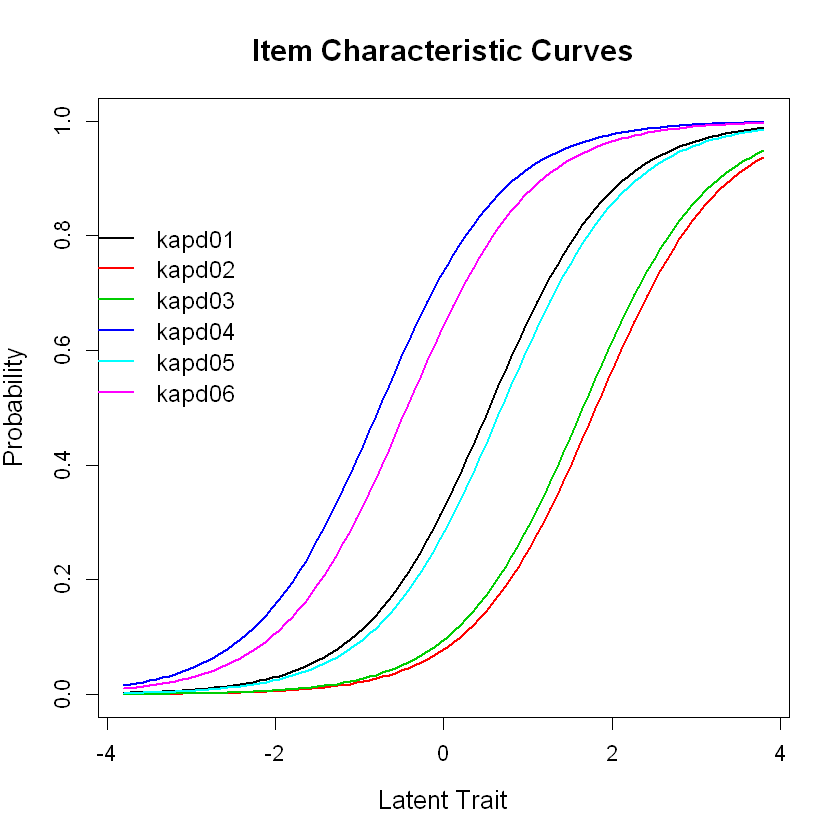

In [48]:
plot(model2, lwd = 2, cex = 1.2, legend = TRUE, cx = -4.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,
     cex.axis = 1.1)


# 各題ICC

- 因為kapd01答對者才能繼續答kapd02、kapd03，表示答kapd02、kapd03兩題者其能力值較高，其中kapd02與其他題項差異最大，因答對機率值為0.5時，其能力值為1.8059為六題中最高者，也表示kapd02難度最高。


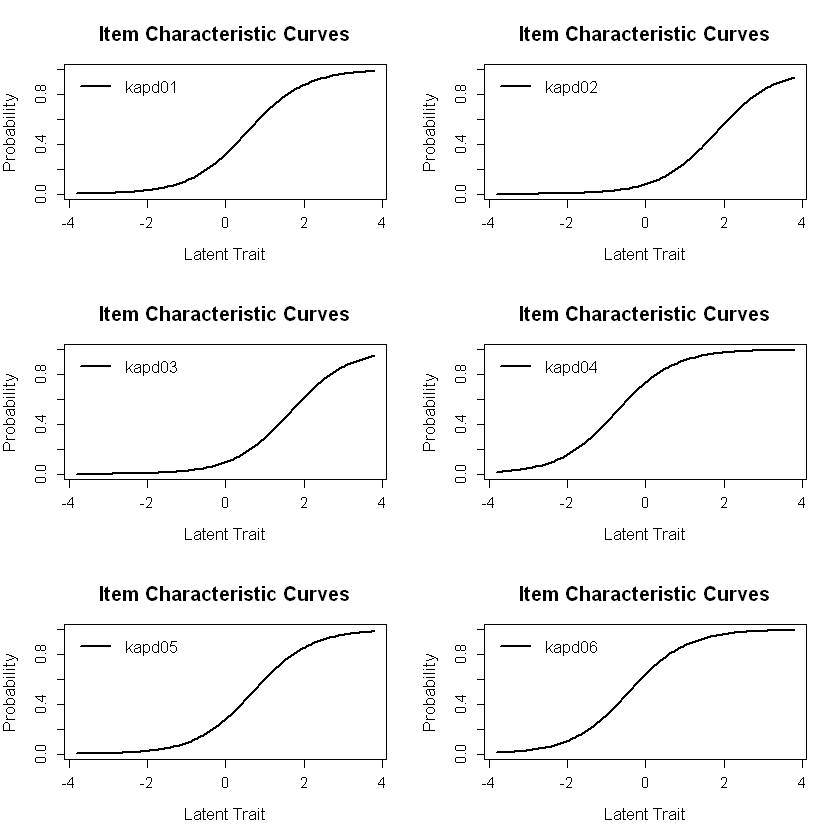

In [49]:
par(mfrow = c(3, 2))
    for (ctg in 1:6) {
    plot(model2, items = ctg, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)
}


In [50]:
summary(model2)


Call:
rasch(data = kapd[, 4:9])

Model Summary:
   log.Lik      AIC      BIC
 -8482.059 16978.12 17019.36

Coefficients:
                value std.err   z.vals
Dffclt.kapd01  0.5384  0.0410  13.1230
Dffclt.kapd02  1.8059  0.0626  28.8478
Dffclt.kapd03  1.6511  0.0589  28.0170
Dffclt.kapd04 -0.7659  0.0429 -17.8448
Dffclt.kapd05  0.6867  0.0425  16.1533
Dffclt.kapd06 -0.4377  0.0399 -10.9825
Dscrmn         1.3592  0.0389  34.9620

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.00096 
quasi-Newton: BFGS 



# 分組別測試 ICC

## 男性

In [51]:
data <- subset(kapd,kapd$sex == 1)
colnames(data)[4:9] <- c("kapd01_sex1","kapd02_sex1","kapd03_sex1","kapd04_sex1","kapd05_sex1","kapd06_sex1")

In [55]:
fitmal <- rasch(data[,4:9])

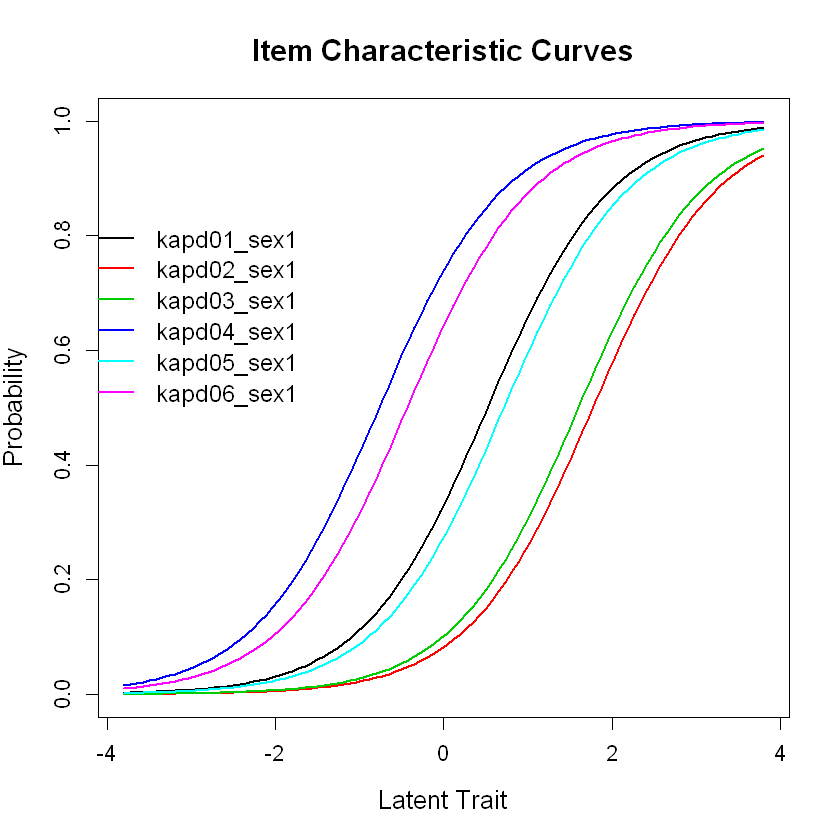

In [56]:
par(mfrow = c(1, 1))
plot(fitmal, lwd = 2, cex = 1.2, legend = TRUE, cx = -4.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,
     cex.axis = 1.1)



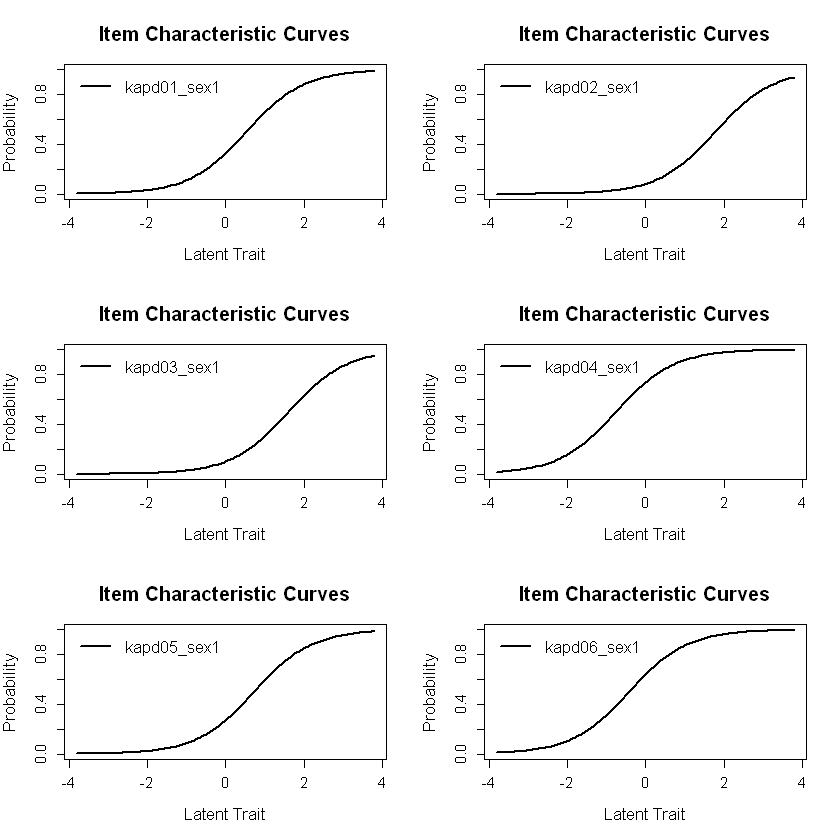

In [57]:
par(mfrow = c(3, 2))
    for (ctg in 1:6) {
    plot(fitmal, items = ctg, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)
}

In [58]:
summary(fitmal)


Call:
rasch(data = data[, 4:9])

Model Summary:
   log.Lik      AIC      BIC
 -4242.083 8498.165 8534.521

Coefficients:
                     value std.err   z.vals
Dffclt.kapd01_sex1  0.5165  0.0579   8.9155
Dffclt.kapd02_sex1  1.7694  0.0873  20.2627
Dffclt.kapd03_sex1  1.5990  0.0818  19.5522
Dffclt.kapd04_sex1 -0.7691  0.0607 -12.6611
Dffclt.kapd05_sex1  0.7134  0.0607  11.7471
Dffclt.kapd06_sex1 -0.4338  0.0564  -7.6979
Dscrmn              1.3599  0.0548  24.8323

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.0099 
quasi-Newton: BFGS 



## 女性

In [59]:
data1 <- subset(kapd,kapd$sex == 2)
colnames(data1)[4:9] <- c("kapd01_sex2","kapd02_sex2","kapd03_sex2","kapd04_sex2","kapd05_sex2","kapd06_sex2")

In [63]:
fitfem <- rasch(data1[,4:9])

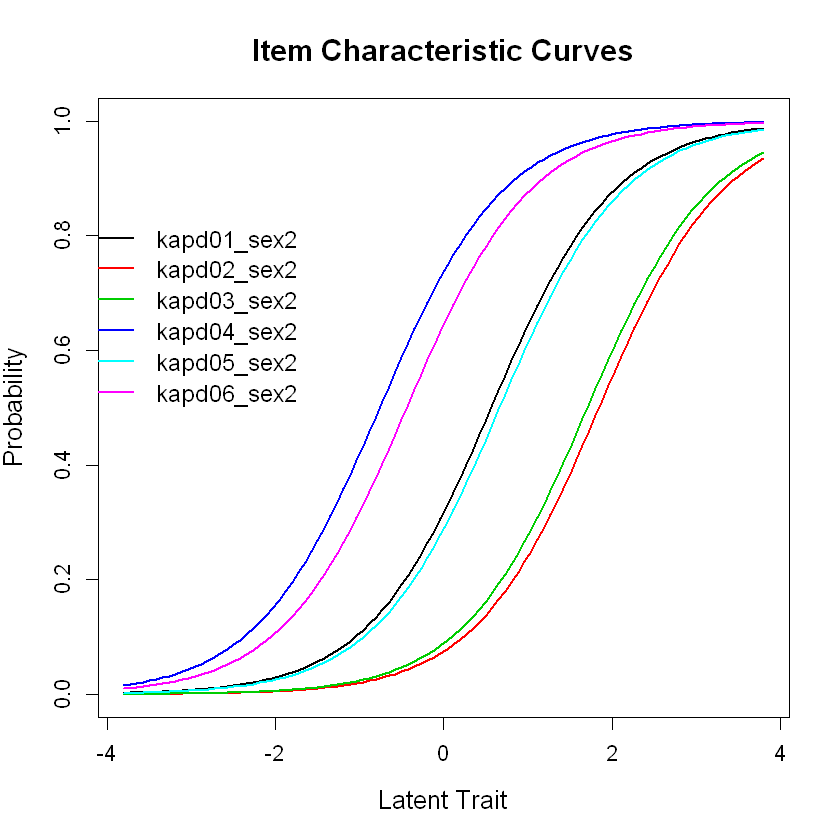

In [64]:
par(mfrow = c(1, 1))
plot(fitfem, lwd = 2, cex = 1.2, legend = TRUE, cx = -4.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,
     cex.axis = 1.1)

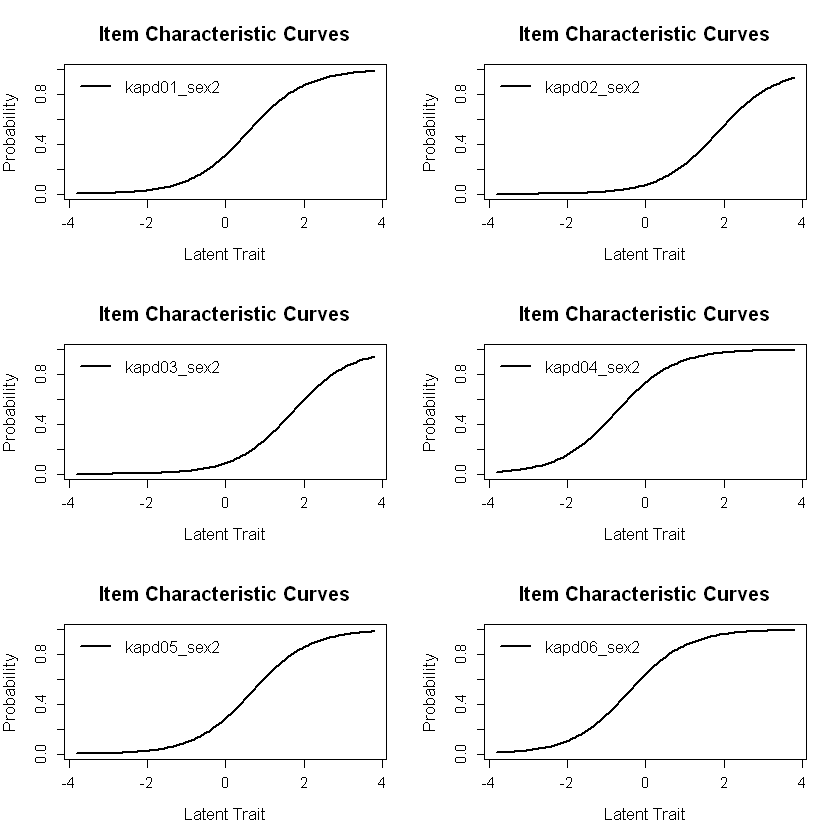

In [65]:
par(mfrow = c(3, 2))
    for (ctg in 1:6) {
    plot(fitfem, items = ctg, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)
}

In [66]:
summary(fitfem)


Call:
rasch(data = data1[, 4:9])

Model Summary:
   log.Lik      AIC      BIC
 -4238.636 8491.273 8527.691

Coefficients:
                     value std.err   z.vals
Dffclt.kapd01_sex2  0.5602  0.0581   9.6398
Dffclt.kapd02_sex2  1.8425  0.0898  20.5249
Dffclt.kapd03_sex2  1.7041  0.0850  20.0505
Dffclt.kapd04_sex2 -0.7625  0.0606 -12.5748
Dffclt.kapd05_sex2  0.6605  0.0595  11.0965
Dffclt.kapd06_sex2 -0.4414  0.0564  -7.8324
Dscrmn              1.3591  0.0552  24.6132

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.033 
quasi-Newton: BFGS 



# 性別之ICC檢驗: sex1:男性, sex2:女性

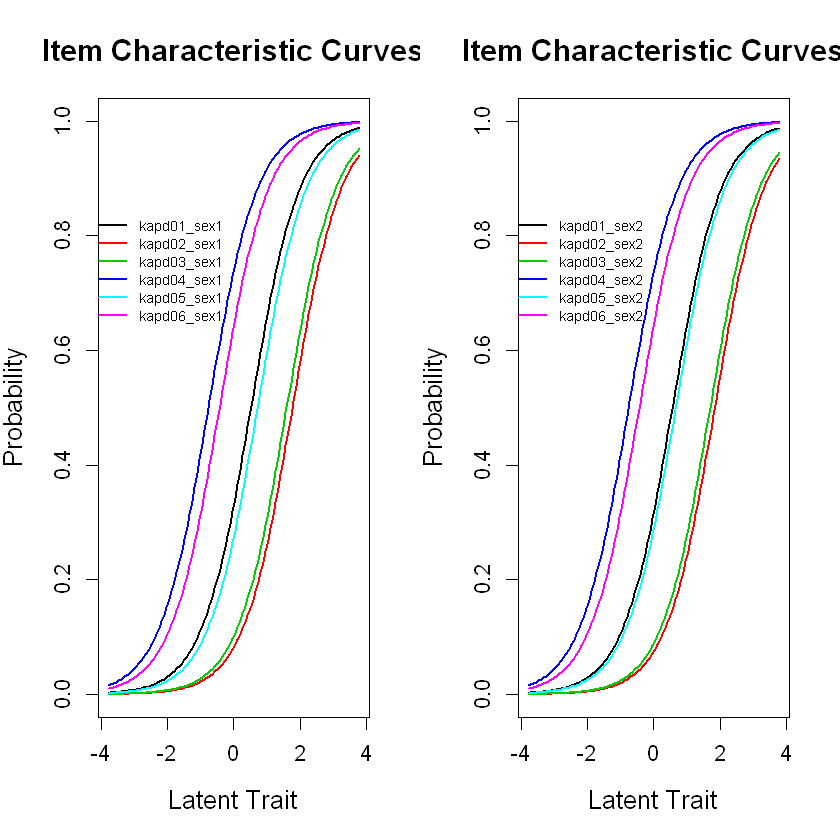

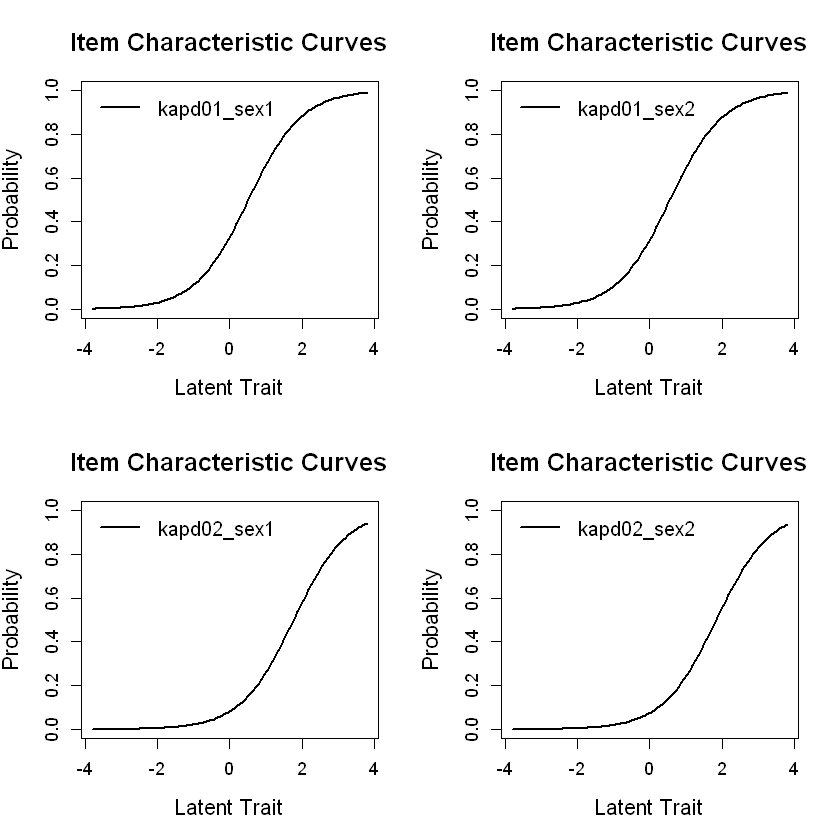

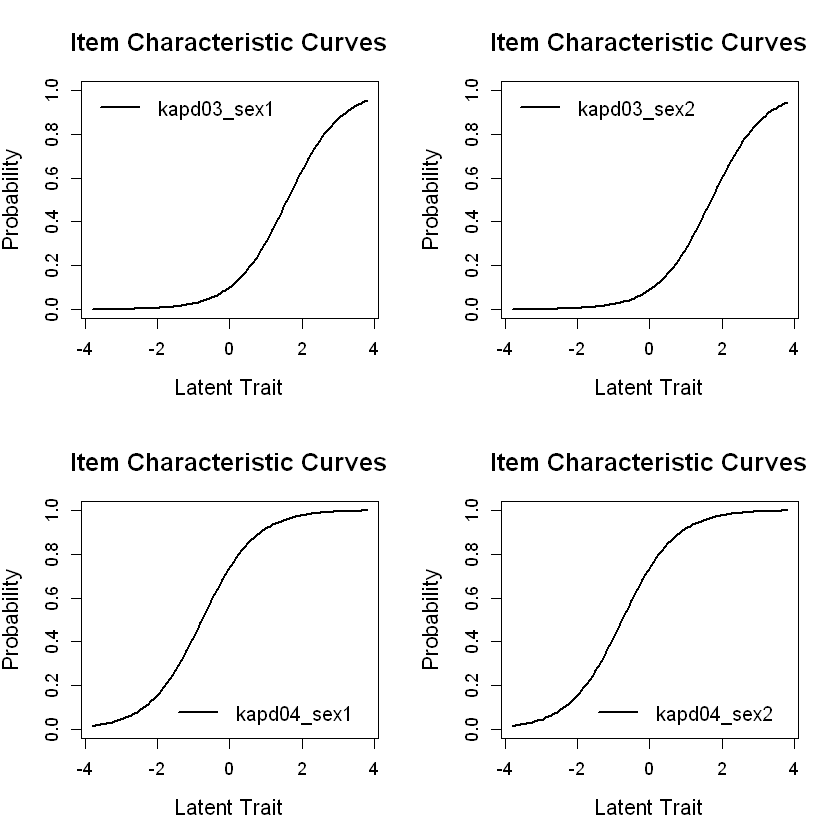

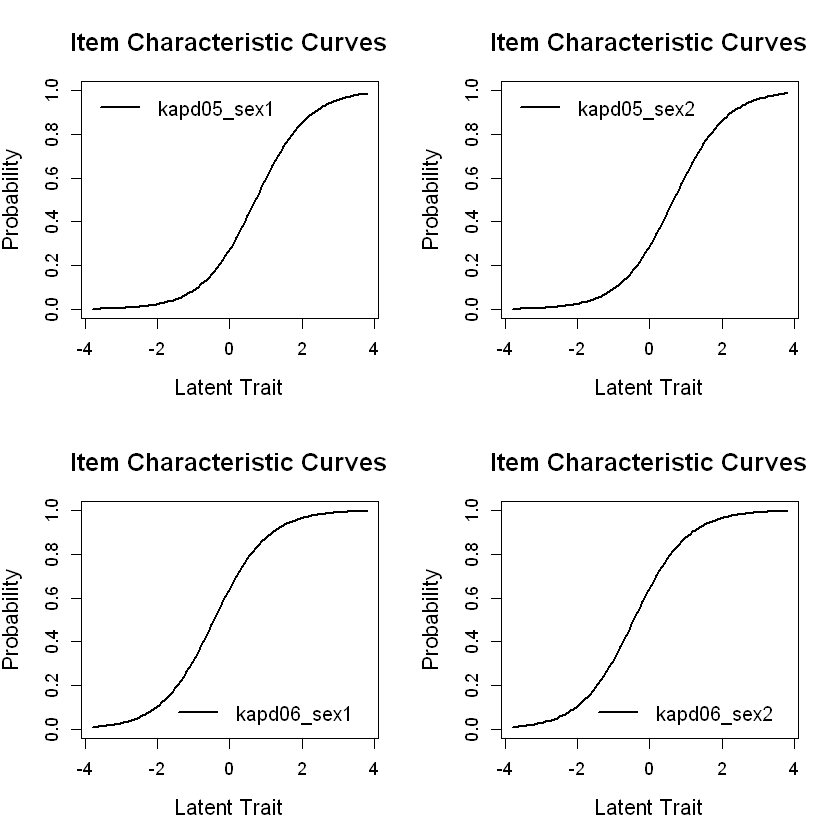

In [67]:
par(mfrow = c(1, 2))

    plot(fitmal, lwd = 2, cex = 0.7, legend = TRUE, cx = -4.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,
     cex.axis = 1.1)

    plot(fitfem, lwd = 2, cex = 0.7, legend = TRUE, cx = -4.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,
     cex.axis = 1.1)

par(mfrow = c(2, 2))

    plot(fitmal, items = 1, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitfem, items = 1, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitmal, items = 2, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitfem, items = 2, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

par(mfrow = c(2, 2))

    plot(fitmal, items = 3, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitfem, items = 3, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitmal, items = 4, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "bottomright",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitfem, items = 4, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "bottomright",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

par(mfrow = c(2, 2))
 
    plot(fitmal, items = 5, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitfem, items = 5, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "topleft",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitmal, items = 6, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "bottomright",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

    plot(fitfem, items = 6, lwd = 2.0, cex = 1.2, legend = TRUE, cx = "bottomright",
           xlab = "Latent Trait", cex.main = 1.5, cex.lab = 1.3,cex.axis = 1.1)

In [68]:
summary(fitmal)
summary(fitfem)


Call:
rasch(data = data[, 4:9])

Model Summary:
   log.Lik      AIC      BIC
 -4242.083 8498.165 8534.521

Coefficients:
                     value std.err   z.vals
Dffclt.kapd01_sex1  0.5165  0.0579   8.9155
Dffclt.kapd02_sex1  1.7694  0.0873  20.2627
Dffclt.kapd03_sex1  1.5990  0.0818  19.5522
Dffclt.kapd04_sex1 -0.7691  0.0607 -12.6611
Dffclt.kapd05_sex1  0.7134  0.0607  11.7471
Dffclt.kapd06_sex1 -0.4338  0.0564  -7.6979
Dscrmn              1.3599  0.0548  24.8323

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.0099 
quasi-Newton: BFGS 




Call:
rasch(data = data1[, 4:9])

Model Summary:
   log.Lik      AIC      BIC
 -4238.636 8491.273 8527.691

Coefficients:
                     value std.err   z.vals
Dffclt.kapd01_sex2  0.5602  0.0581   9.6398
Dffclt.kapd02_sex2  1.8425  0.0898  20.5249
Dffclt.kapd03_sex2  1.7041  0.0850  20.0505
Dffclt.kapd04_sex2 -0.7625  0.0606 -12.5748
Dffclt.kapd05_sex2  0.6605  0.0595  11.0965
Dffclt.kapd06_sex2 -0.4414  0.0564  -7.8324
Dscrmn              1.3591  0.0552  24.6132

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.033 
quasi-Newton: BFGS 



### ICC性別分組分析後發現，難度與鑑別度之差異並不明顯，故通過ICC檢驗

### 倘若需要另外挑題，則可由IIC做選擇
### 難度偏易可以挑選kapd04或kapd06，難易偏中可以挑選kapd01或kapd05，難度偏難可以挑選kapd02或kapd04。